## Simple Linear Regression



### Importing packages

In [45]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

### Create our own data

In [46]:
datafile = pd.DataFrame()
datafile[0] = np.arange(2000,2020)
datafile[1] = [50,54,62,78,65,69,72,77,85,98,75,80,82,85,88,75,90,93,95,98]
#datafile[0] = [1,3,5]
datafile1 = pd.DataFrame()
datafile1[0] = np.arange(2000,2020)
datafile1[1] = [50,54,62,65,68,70,71,74,76,80,82,77,86,90,91,93,94,95,98,100]
#datafile[1] = [22,34,50]
datafile.columns =["Year","Placement"]
datafile1.columns =["Year","Placement"]
print(datafile)
print(datafile1)

    Year  Placement
0   2000         50
1   2001         54
2   2002         62
3   2003         78
4   2004         65
5   2005         69
6   2006         72
7   2007         77
8   2008         85
9   2009         98
10  2010         75
11  2011         80
12  2012         82
13  2013         85
14  2014         88
15  2015         75
16  2016         90
17  2017         93
18  2018         95
19  2019         98
    Year  Placement
0   2000         50
1   2001         54
2   2002         62
3   2003         65
4   2004         68
5   2005         70
6   2006         71
7   2007         74
8   2008         76
9   2009         80
10  2010         82
11  2011         77
12  2012         86
13  2013         90
14  2014         91
15  2015         93
16  2016         94
17  2017         95
18  2018         98
19  2019        100


## Checking Linearity


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


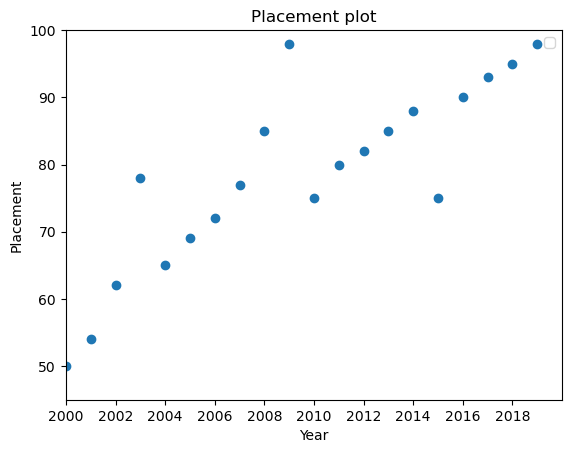

In [47]:
plt.scatter(datafile['Year'],datafile['Placement'])
plt.title("Placement plot")
plt.xlim(2000,2020)
plt.ylim(45,100)
plt.xticks(np.arange(2000,2020,2))
plt.legend()
plt.xlabel("Year")
plt.ylabel("Placement")
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


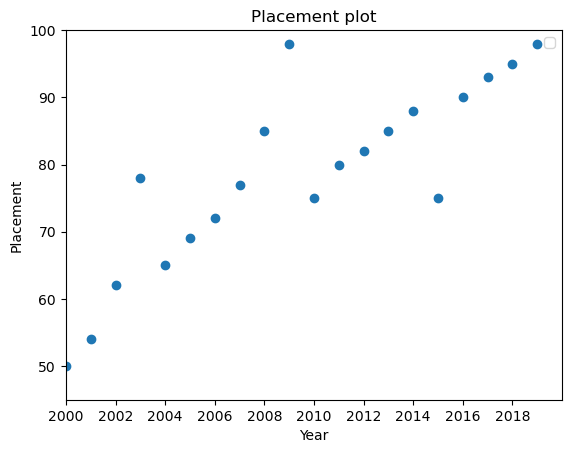

In [48]:
plt.scatter(datafile1['Year'],datafile['Placement'])
plt.title("Placement plot")
plt.xlim(2000,2020)
plt.ylim(45,100)
plt.xticks(np.arange(2000,2020,2))
plt.legend()
plt.xlabel("Year")
plt.ylabel("Placement")
plt.show()

<Axes: >

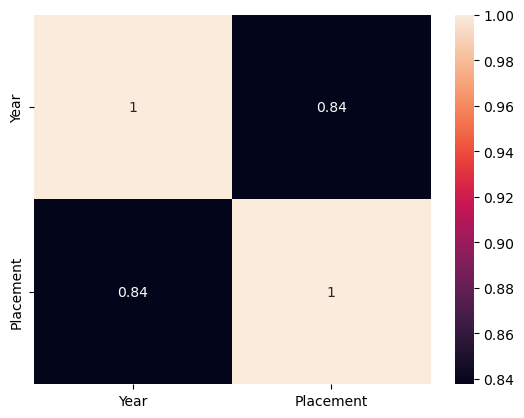

In [49]:
import seaborn as sb
data_corr = datafile.corr()
sb.heatmap(data_corr,annot=True)

<Axes: >

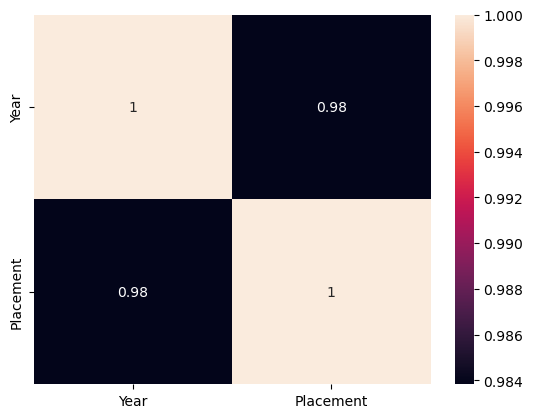

In [50]:
import seaborn as sb
data_corr = datafile1.corr()
sb.heatmap(data_corr,annot=True)

### Modeling

In [51]:
from sklearn import linear_model
regress = linear_model.LinearRegression()

train_x = np.asanyarray(datafile[['Year']])
train_y = np.asanyarray(datafile[['Placement']])
#print(train_x)
#print(train_y)

regress.fit (train_x,train_y)
# The coefficients
print ('Coefficients: ', regress.coef_)
print ('Intercept: ',regress.intercept_)

regress1 = linear_model.LinearRegression()
train_x1 = np.asanyarray(datafile1[['Year']])
train_y1 = np.asanyarray(datafile1[['Placement']])
#print(train_x)
#print(train_y)

regress1.fit (train_x1,train_y1)
# The coefficients
print ('Coefficients: ', regress1.coef_)
print ('Intercept: ',regress1.intercept_)

Coefficients:  [[1.94661654]]
Intercept:  [-3833.17593985]
Coefficients:  [[2.43007519]]
Intercept:  [-4804.43609023]


#### Plot outputs

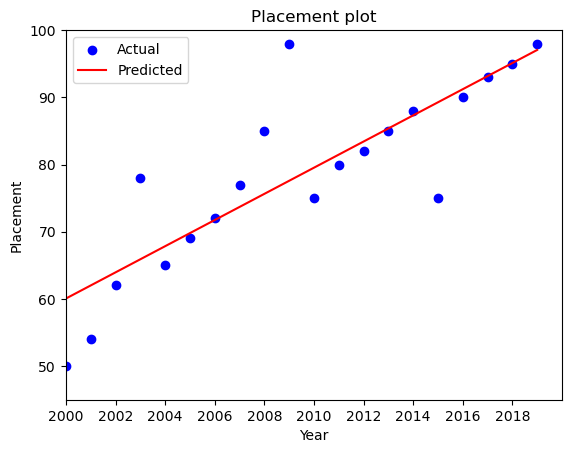

In [52]:
plt.scatter(datafile.Year, datafile.Placement,  color='blue',label="Actual")
plt.plot(train_x, regress.coef_[0][0]*train_x + regress.intercept_[0], '-r',label="Predicted")
plt.title("Placement plot")
plt.xlim(2000,2020)
plt.ylim(45,100)
plt.xticks(np.arange(2000,2020,2))
plt.legend()
plt.xlabel("Year")
plt.ylabel("Placement")
plt.show()

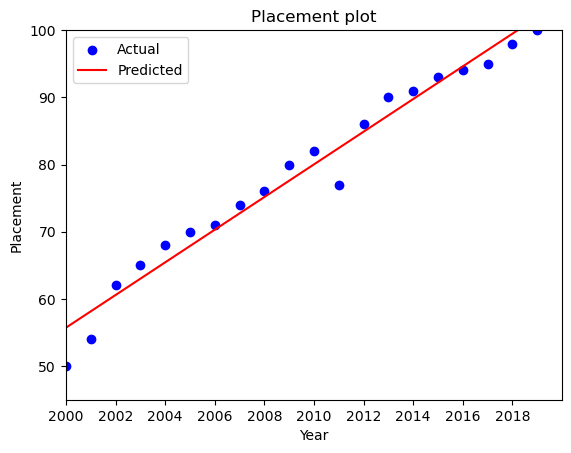

In [53]:
plt.scatter(datafile1.Year, datafile1.Placement,  color='blue',label="Actual")
plt.plot(train_x, regress1.coef_[0][0]*train_x1 + regress1.intercept_[0], '-r',label="Predicted")
plt.title("Placement plot")
plt.xlim(2000,2020)
plt.ylim(45,100)
plt.xticks(np.arange(2000,2020,2))
plt.legend()
plt.xlabel("Year")
plt.ylabel("Placement")
plt.show()

In [54]:
y_predicted = regress.predict(train_x)
for i in range(0,len(train_x)):
    print(train_y[i],y_predicted[i])
datafile['Predicted'] = y_predicted
print(y_predicted)
print(datafile.head(10))

[50] [60.05714286]
[54] [62.0037594]
[62] [63.95037594]
[78] [65.89699248]
[65] [67.84360902]
[69] [69.79022556]
[72] [71.73684211]
[77] [73.68345865]
[85] [75.63007519]
[98] [77.57669173]
[75] [79.52330827]
[80] [81.46992481]
[82] [83.41654135]
[85] [85.36315789]
[88] [87.30977444]
[75] [89.25639098]
[90] [91.20300752]
[93] [93.14962406]
[95] [95.0962406]
[98] [97.04285714]
[[60.05714286]
 [62.0037594 ]
 [63.95037594]
 [65.89699248]
 [67.84360902]
 [69.79022556]
 [71.73684211]
 [73.68345865]
 [75.63007519]
 [77.57669173]
 [79.52330827]
 [81.46992481]
 [83.41654135]
 [85.36315789]
 [87.30977444]
 [89.25639098]
 [91.20300752]
 [93.14962406]
 [95.0962406 ]
 [97.04285714]]
   Year  Placement  Predicted
0  2000         50  60.057143
1  2001         54  62.003759
2  2002         62  63.950376
3  2003         78  65.896992
4  2004         65  67.843609
5  2005         69  69.790226
6  2006         72  71.736842
7  2007         77  73.683459
8  2008         85  75.630075
9  2009         98  7

In [55]:
y1_predicted = regress1.predict(train_x1)
for i in range(0,len(train_x1)):
    print(train_y1[i],y1_predicted[i])
datafile1['Predicted'] = y1_predicted
print(y1_predicted)
print(datafile1.head(10))

[50] [55.71428571]
[54] [58.1443609]
[62] [60.57443609]
[65] [63.00451128]
[68] [65.43458647]
[70] [67.86466165]
[71] [70.29473684]
[74] [72.72481203]
[76] [75.15488722]
[80] [77.58496241]
[82] [80.01503759]
[77] [82.44511278]
[86] [84.87518797]
[90] [87.30526316]
[91] [89.73533835]
[93] [92.16541353]
[94] [94.59548872]
[95] [97.02556391]
[98] [99.4556391]
[100] [101.88571429]
[[ 55.71428571]
 [ 58.1443609 ]
 [ 60.57443609]
 [ 63.00451128]
 [ 65.43458647]
 [ 67.86466165]
 [ 70.29473684]
 [ 72.72481203]
 [ 75.15488722]
 [ 77.58496241]
 [ 80.01503759]
 [ 82.44511278]
 [ 84.87518797]
 [ 87.30526316]
 [ 89.73533835]
 [ 92.16541353]
 [ 94.59548872]
 [ 97.02556391]
 [ 99.4556391 ]
 [101.88571429]]
   Year  Placement  Predicted
0  2000         50  55.714286
1  2001         54  58.144361
2  2002         62  60.574436
3  2003         65  63.004511
4  2004         68  65.434586
5  2005         70  67.864662
6  2006         71  70.294737
7  2007         74  72.724812
8  2008         76  75.154887

#### Performance measurement
Any of the following metrics may be used:
<ul>
    <li> Mean absolute error: It is the average of the absolute value of all the errors. </li>
    <li> Mean Squared Error (MSE): Mean Squared Error (MSE) is the mean of the squared error. This is efficient since the focus is on large errors and doesnot consider sign of error.</li>
    <li> Root Mean Squared Error (RMSE): This is a metric to calculate the accuracy of the model. It represents how close the data are to the fitted regression line. The higher the R-squared, the better the model fits your data. Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse).</li>
</ul>

In [56]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(train_y, y_predicted))
print('Mean Squared Error:', metrics.mean_squared_error(train_y, y_predicted))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(train_y, y_predicted)))

Mean Absolute Error: 4.712330827067649
Mean Squared Error: 53.55274436090161
Root Mean Squared Error: 7.317974061234544


In [57]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(train_y1, y1_predicted))
print('Mean Squared Error:', metrics.mean_squared_error(train_y1, y1_predicted))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(train_y1, y1_predicted)))

Mean Absolute Error: 2.1266165413534055
Mean Squared Error: 6.509924812030482
Root Mean Squared Error: 2.551455430147758


In [58]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(datafile[['Year']])
test_y = np.asanyarray(datafile[['Placement']])
test_y_predicted = regress.predict(test_x)

print("Mean absolute error (MAE):" , np.mean(np.absolute(test_y_predicted - test_y)))
print("Mean square error (MSE): " , np.mean((test_y_predicted - test_y) ** 2))
print("R2-score: %.2f (RMSE):" , r2_score(test_y, test_y_predicted) )

Mean absolute error (MAE): 4.712330827067649
Mean square error (MSE):  53.55274436090161
R2-score: %.2f (RMSE): 0.7017349483512629


In [59]:
from sklearn.metrics import r2_score

test_x1 = np.asanyarray(datafile1[['Year']])
test_y1 = np.asanyarray(datafile1[['Placement']])
test_y1_predicted = regress1.predict(test_x1)

print("Mean absolute error (MAE):" , np.mean(np.absolute(test_y1_predicted - test_y1))) 
print("Mean square error (MSE): " , np.mean((test_y1_predicted - test_y1) ** 2))
print("R2-score: %.2f (RMSE):" , r2_score(test_y1, test_y1_predicted) )

Mean absolute error (MAE): 2.1266165413534055
Mean square error (MSE):  6.509924812030482
R2-score: %.2f (RMSE): 0.9679092733312112


In [16]:
pip install statsmodels

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [60]:
#R^2 and Adjusted R^2
import pandas as pd
import numpy as np
import statsmodels.formula.api as sm
formula = 'Placement ~ Year'
 
 
regressor_OLS = sm.ols(formula=formula , data=datafile).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Placement   R-squared:                       0.702
Model:                            OLS   Adj. R-squared:                  0.685
Method:                 Least Squares   F-statistic:                     42.35
Date:                Mon, 05 Feb 2024   Prob (F-statistic):           4.05e-06
Time:                        12:13:21   Log-Likelihood:                -68.185
No. Observations:                  20   AIC:                             140.4
Df Residuals:                      18   BIC:                             142.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -3833.1759    601.103     -6.377      0.000   -5096.046   -2570.306
Year           1.9466      0.299      6.508      0.000       1.318       2.575
==============================================================================
Omnibus:                        6.771   Durbin-Watson:                   1.555
Prob(Omnibus):                  0.034   Jarque-Bera (JB):                4.291
Skew:                           0.841   Prob(JB):                        0.117
Kurtosis:                       4.523   Cond. No.                     7.00e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large,  7e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [61]:
#R^2 and Adjusted R^2
import pandas as pd
import numpy as np
import statsmodels.formula.api as sm
formula = 'Placement ~ Year'
 
 
regressor_OLS = sm.ols(formula=formula , data=datafile1).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Placement   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.966
Method:                 Least Squares   F-statistic:                     542.9
Date:                Mon, 05 Feb 2024   Prob (F-statistic):           6.79e-15
Time:                        12:13:25   Log-Likelihood:                -47.112
No. Observations:                  20   AIC:                             98.22
Df Residuals:                      18   BIC:                             100.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -4804.4361    209.578    -22.924      0.000   -5244.743   -4364.129
Year           2.4301      0.104     23.300      0.000       2.211       2.649
==============================================================================
Omnibus:                        4.955   Durbin-Watson:                   1.131
Prob(Omnibus):                  0.084   Jarque-Bera (JB):                3.739
Skew:                          -1.058   Prob(JB):                        0.154
Kurtosis:                       2.913   Cond. No.                     7.00e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large,  7e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Using training and testing data

In [62]:
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(datafile[['Year']], datafile[['Placement']], test_size=0.30, random_state=42)
print(train_x)
print("Testing")
print(test_x)

from sklearn import linear_model
regress = linear_model.LinearRegression()
regress.fit (train_x,train_y)
# The coefficients
print ('Coefficients: ', regress.coef_)
print ('Intercept: ',regress.intercept_)

    Year
11  2011
3   2003
18  2018
16  2016
13  2013
2   2002
9   2009
19  2019
4   2004
12  2012
7   2007
10  2010
14  2014
6   2006
Testing
    Year
0   2000
17  2017
15  2015
1   2001
8   2008
5   2005
Coefficients:  [[1.70675575]]
Intercept:  [-3349.2809948]


In [63]:
y_predicted = regress.predict(test_x)
print(test_x)
print(test_y)
print(y_predicted)


    Year
0   2000
17  2017
15  2015
1   2001
8   2008
5   2005
    Placement
0          50
17         93
15         75
1          54
8          85
5          69
[[64.23051225]
 [93.24536006]
 [89.83184855]
 [65.937268  ]
 [77.88455828]
 [72.76429102]]


In [64]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(test_y, y_predicted))
print('Mean Squared Error:', metrics.mean_squared_error(test_y, y_predicted))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(test_y, y_predicted)))

Mean Absolute Error: 8.687453600594003
Mean Squared Error: 104.9748628433119
Root Mean Squared Error: 10.245724124887996


In [65]:
from sklearn.model_selection import cross_val_score
accuracy = cross_val_score(regress, datafile[['Year']], datafile[['Placement']], cv = 5,scoring='r2')
print(accuracy)

[-0.00562185  0.73731733 -1.08086996 -2.00601522  0.92745586]


In [32]:
import sklearn
print(sklearn.metrics.scorers.keys())

AttributeError: module 'sklearn.metrics' has no attribute 'scorers'

In [66]:
from sklearn.model_selection import train_test_split

train_x1, test_x1, train_y1, test_y1 = train_test_split(datafile1[['Year']], datafile1[['Placement']], test_size=0.30, random_state=42)
print(train_x1)
print("Testing")
print(test_x1)

from sklearn import linear_model
regress1 = linear_model.LinearRegression()
regress1.fit (train_x1,train_y1)
# The coefficients
print ('Coefficients: ', regress1.coef_)
print ('Intercept: ',regress1.intercept_)

    Year
11  2011
3   2003
18  2018
16  2016
13  2013
2   2002
9   2009
19  2019
4   2004
12  2012
7   2007
10  2010
14  2014
6   2006
Testing
    Year
0   2000
17  2017
15  2015
1   2001
8   2008
5   2005
Coefficients:  [[2.23682257]]
Intercept:  [-4415.36674091]


In [67]:
y1_predicted = regress1.predict(test_x1)
print(test_x1)
print(test_y1)
print(y1_predicted)

    Year
0   2000
17  2017
15  2015
1   2001
8   2008
5   2005
    Placement
0          50
17         95
15         93
1          54
8          76
5          70
[[58.27839644]
 [96.3043801 ]
 [91.83073497]
 [60.51521901]
 [76.17297699]
 [69.46250928]]


In [68]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(test_y1, y1_predicted))
print('Mean Squared Error:', metrics.mean_squared_error(test_y1, y1_predicted))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(test_y1, y1_predicted)))

Mean Absolute Error: 2.9962880475128864
Mean Squared Error: 19.061221955284054
Root Mean Squared Error: 4.3659159354348605


In [69]:
from sklearn.model_selection import cross_val_score
accuracy1 = cross_val_score(regress1, datafile1[['Year']], datafile1[['Placement']], cv = 5,scoring='r2')
print(accuracy1)

[ 0.12059107 -0.35834285 -0.77691677  0.24934316 -1.45027853]
